In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2286.00,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,12753375.12,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,61012096.51,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,34.00,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,195793.25,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.75,64.91,92.00,17.00,43.50,4.00,93.00,5.75,93.00,0.10,1766.95,1386542.00,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7420359.00,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1293859294.00,27.70,28.60,0.95,20.70


In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Dipht2heria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_mortality                  2928 non-null   float64
 5   Infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage_expenditure           2938 non-null   float64
 8   HepatitisB                       2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under_five_deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [10]:
df = df.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))
# df.groupby('Country').sum()

In [11]:
from typing import List
# no need to reset index since index is already at default
series_list: List = []

for year in df.Year.unique():
    series_data = df[df.Year == year].copy()
    for col in series_data.columns[3:]:
        series_data[col] = df[col].fillna(df[col].dropna().median()).copy()

    series_list.append(series_data)

In [12]:
#creating new df from that
modified_df = pd.concat(series_list).copy()

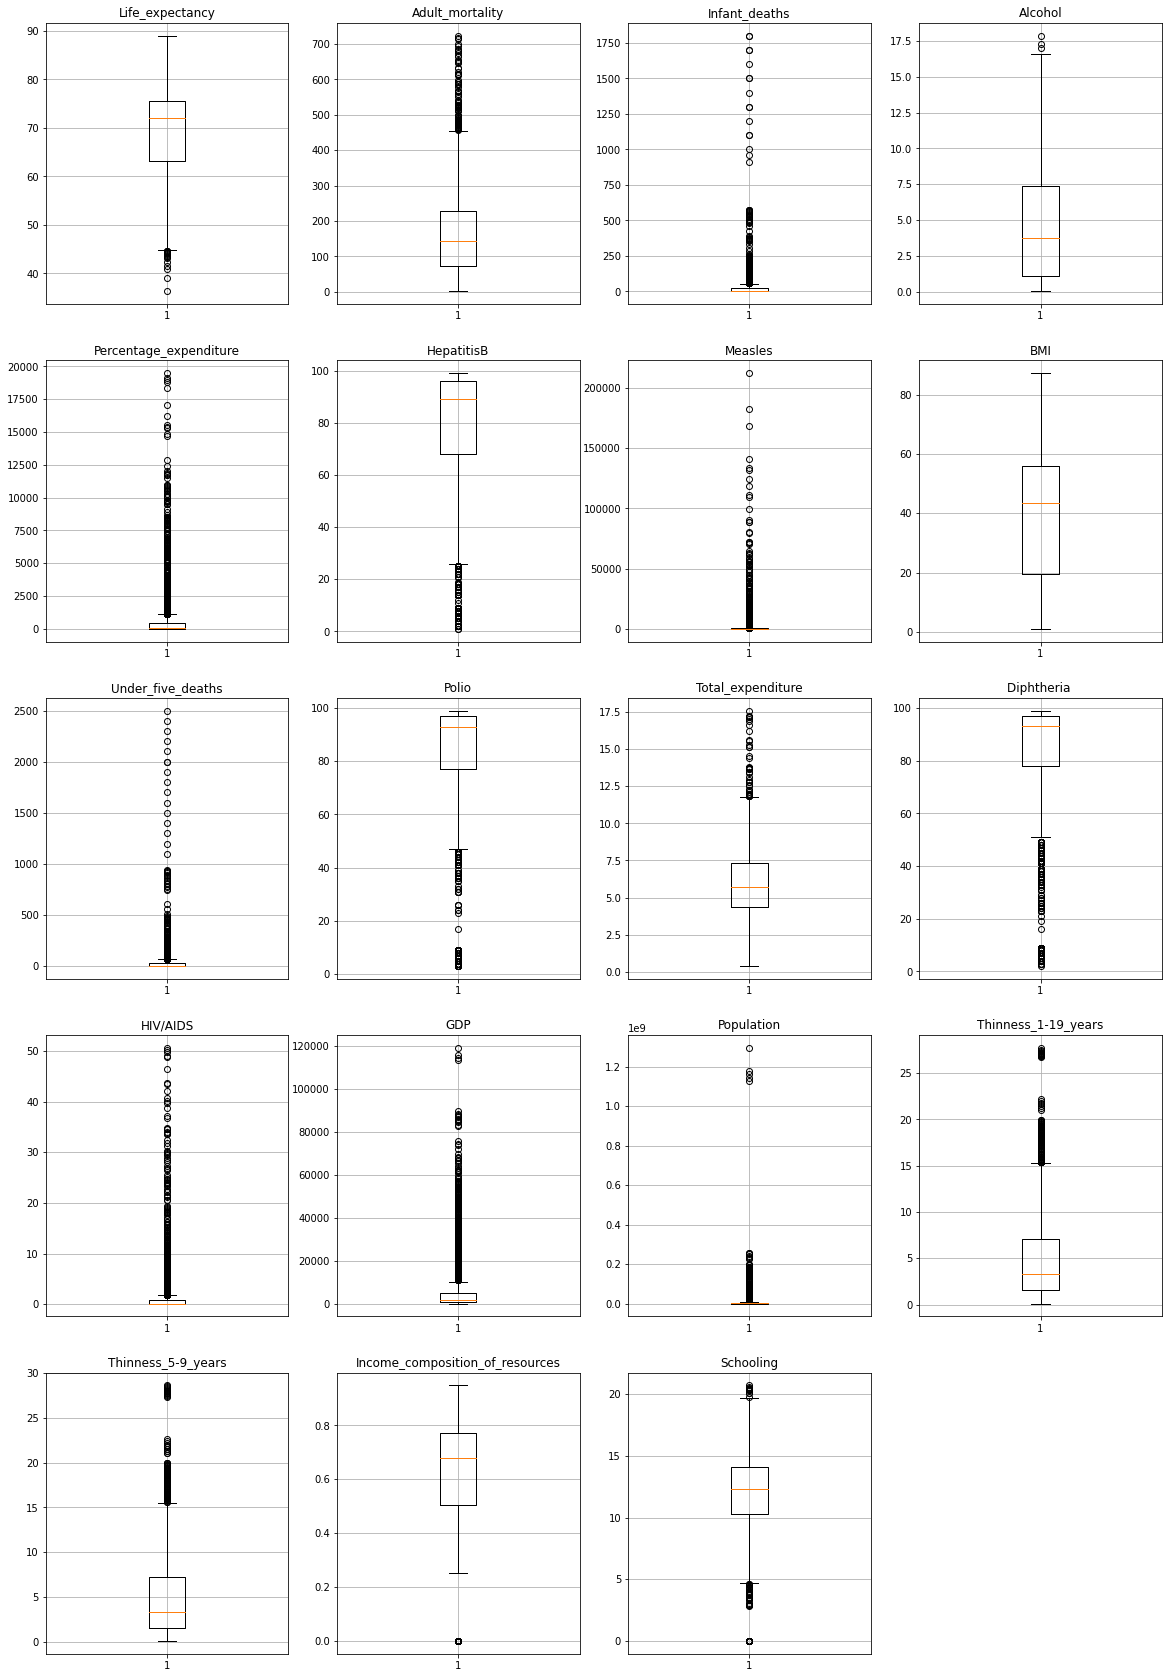

In [13]:
#detecting outliers

fig = plt.figure(figsize=(20,30))

for idx, col in enumerate(modified_df.columns[3:]):
    plt.subplot(5,4,idx+1)
    plt.boxplot(modified_df[col])
    plt.title(col)
    plt.grid(True)

plt.show()

In [14]:
modified_df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [15]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [16]:
#using winsorization

from scipy.stats.mstats import winsorize

#reduced the df rows
modified_df = modified_df[modified_df['Infant_deaths'] < 1001]
modified_df = modified_df[modified_df['Measles'] < 1001]
modified_df = modified_df[modified_df['Under_five_deaths'] < 1001]

modified_df.drop(['BMI'], axis=1, inplace=True)
modified_df['log_Percentage_expenditure'] = np.log(modified_df['Percentage_expenditure'])
modified_df['log_Population'] = np.log(modified_df['Population'])
modified_df['log_GDP'] = np.log(modified_df['GDP'])
modified_df = modified_df.replace([np.inf, -np.inf], 0)

modified_df['winz_Life_expectancy'] = winsorize(modified_df['Life_expectancy'], (0.05,0))
modified_df['winz_Adult_mortality'] = winsorize(modified_df['Adult_mortality'], (0,0.04))
modified_df['winz_Alcohol'] = winsorize(modified_df['Alcohol'], (0.0,0.01))
modified_df['winz_HepatitisB'] = winsorize(modified_df['HepatitisB'], (0.20,0.0))
modified_df['winz_Polio'] = winsorize(modified_df['Polio'], (0.20,0.0))
modified_df['winz_Total_expenditure'] = winsorize(modified_df['Total_expenditure'], (0.0,0.02))
modified_df['winz_Diphtheria'] = winsorize(modified_df['Diphtheria '], (0.11,0.0))
modified_df['winz_HIV/AIDS'] = winsorize(modified_df['HIV/AIDS'], (0.0,0.21))
modified_df['winz_Thinness_1-19_years'] = winsorize(modified_df['Thinness_1-19_years'], (0.0,0.04))
modified_df['winz_Thinness_5-9_years'] = winsorize(modified_df['Thinness_5-9_years'], (0.0,0.04))
modified_df['winz_Income_composition_of_resources'] = winsorize(modified_df['Income_composition_of_resources'], (0.05,0.0))
modified_df['winz_Schooling'] = winsorize(modified_df['Schooling'], (0.03,0.01))

/Users/rexlopper/.pyenv/versions/3.10.0/envs/my-310-python/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


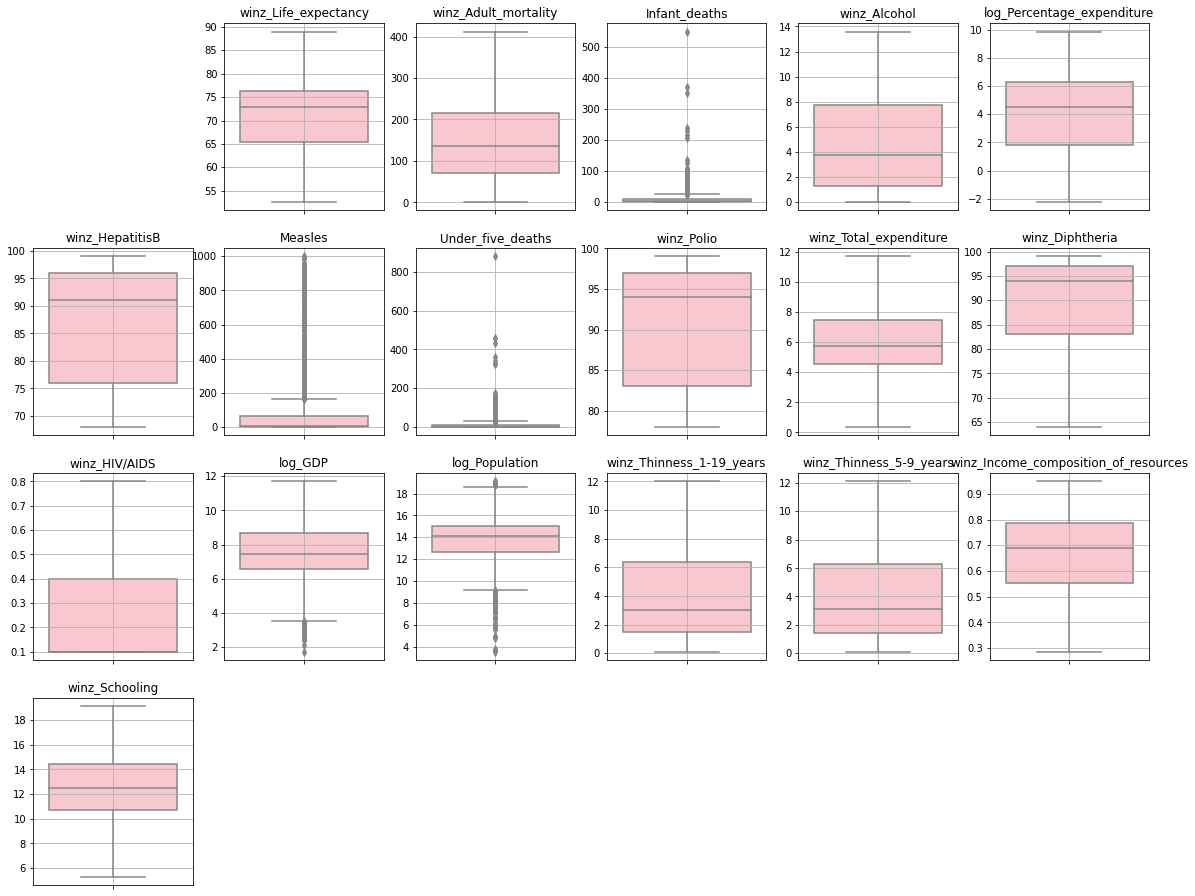

In [17]:
#plotting
import seaborn as sns

fig = plt.figure(figsize=(20,20))

col_dict_winz = {'winz_Life_expectancy':1,'winz_Adult_mortality':2,'Infant_deaths':3,'winz_Alcohol':4,
            'log_Percentage_expenditure':5,'winz_HepatitisB':6,'Measles':7,'Under_five_deaths':8,'winz_Polio':9,
            'winz_Total_expenditure':10,'winz_Diphtheria':11,'winz_HIV/AIDS':12,'log_GDP':13,'log_Population':14,
            'winz_Thinness_1-19_years':15,'winz_Thinness_5-9_years':16,'winz_Income_composition_of_resources':17,
            'winz_Schooling':18}


for col, idx in col_dict_winz.items():
    plt.subplot(5,6,idx+1)
    sns.boxplot(y = modified_df[col], color = 'pink')
    plt.title(col)
    plt.ylabel('')
    plt.grid(True)

plt.show()

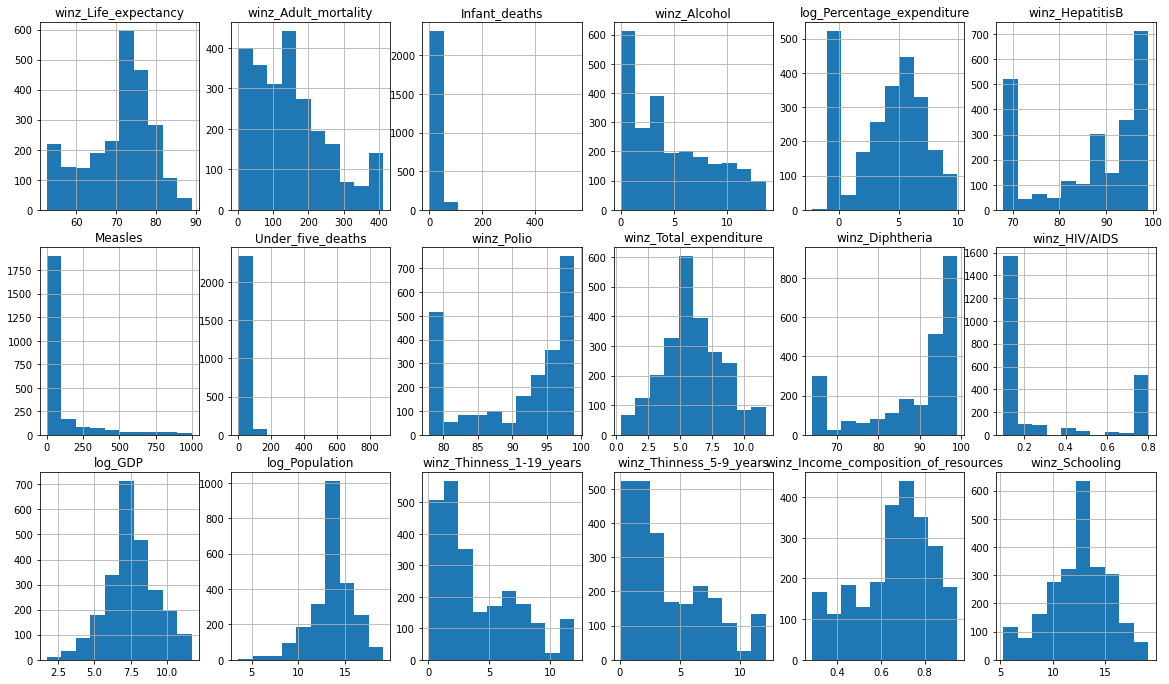

In [18]:
fig = plt.figure(figsize=(20,20))
for col,idx in col_dict_winz.items():
                     plt.subplot(5,6,idx)
                     plt.hist(modified_df[col])
                     plt.title(col)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()

<AxesSubplot:>

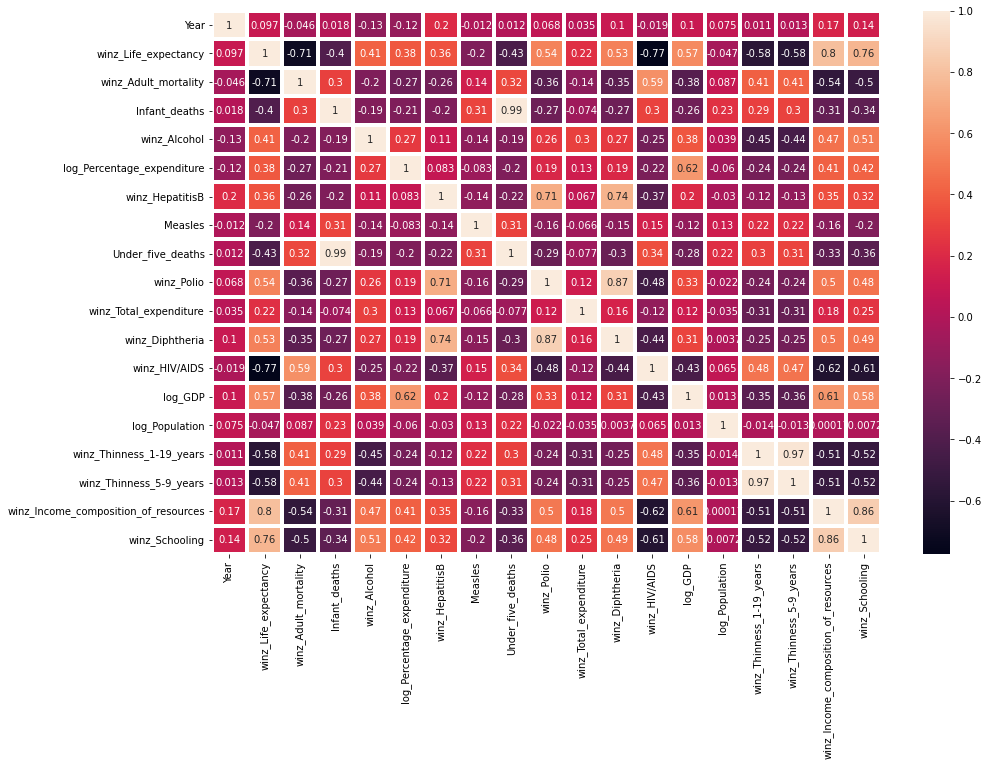

In [19]:


#creating the heatmap
life_exp = modified_df[['Year'] + list(col_dict_winz.keys())]
plt.figure(figsize=(15,10))
sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)

In [30]:
status_life_exp = modified_df.groupby(by=['Status']).mean().reset_index().sort_values('winz_Life_expectancy',ascending=False).reset_index(drop=True)

plt.figure(figsize=(20,10))

fig = px.bar(status_life_exp, x='Status', y='winz_Life_expectancy',color='winz_Life_expectancy')

fig.update_layout(
        title="Life expectancy according to status",
        xaxis_title="Status",
        yaxis_title="Average Life Expectancy",
        font=dict(
            family="Courier New",
            size=16,
            color="black"
        )
    )
fig.show()

<Figure size 1440x720 with 0 Axes>

In [37]:
life_year = modified_df.groupby(by = ['Year', 'Status']).mean().reset_index()
Developed = life_year.loc[life_year['Status'] == 'Developed',:]
Developing = life_year.loc[life_year['Status'] == 'Developing',:]
fig1 = go.Figure()
for template in ["plotly_dark"]:
    fig1.add_trace(go.Scatter(x=Developing['Year'], y=Developing['winz_Life_expectancy'],
                    mode='lines',
                    name='Developing',
                    marker_color='#f075c2'))
    fig1.add_trace(go.Scatter(x=Developed['Year'], y=Developed['winz_Life_expectancy'],
                    mode='lines',
                    name='Developed',
                    marker_color='#28d2c2'))
    fig1.update_layout(
    height=500,
    xaxis_title="Years",
    yaxis_title='Life expectancy in age',
    title_text='Average Life expectancy of Developing and Developed countries over the years',
    template=template)
fig1.show()